In [77]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.cluster import KMeans
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from rapidfuzz import process, fuzz
import geopandas as gpd


### 📥 Data Loading
Loading the crime dataset into a pandas DataFrame for analysis.

In [78]:
df = pd.read_csv("Districtwise_Crime_of_India_2001_to_2014 - Sheet1.csv")

### 👀 Data Preview
Previewing the first few rows of the dataset to understand its structure.

In [79]:
df.head()

,Unnamed: 0,STATE/UT,DISTRICT,YEAR,MURDER,ATTEMPT TO MURDER,CULPABLE HOMICIDE NOT AMOUNTING TO MURDER,RAPE,CUSTODIAL RAPE,OTHER RAPE,...,ARSON,HURT/GREVIOUS HURT,DOWRY DEATHS,ASSAULT ON WOMEN WITH INTENT TO OUTRAGE HER MODESTY,INSULT TO MODESTY OF WOMEN,CRUELTY BY HUSBAND OR HIS RELATIVES,IMPORTATION OF GIRLS FROM FOREIGN COUNTRIES,CAUSING DEATH BY NEGLIGENCE,OTHER IPC CRIMES,TOTAL IPC CRIMES
0,0,ANDHRA PRADESH,ADILABAD,2001,101,60,17,50,0,50,...,30,1131,16,149,34,175,0,181,1518,4154
1,1,ANDHRA PRADESH,ANANTAPUR,2001,151,125,1,23,0,23,...,69,1543,7,118,24,154,0,270,754,4125
2,2,ANDHRA PRADESH,CHITTOOR,2001,101,57,2,27,0,27,...,38,2088,14,112,83,186,0,404,1262,5818
3,3,ANDHRA PRADESH,CUDDAPAH,2001,80,53,1,20,0,20,...,23,795,17,126,38,57,0,233,1181,3140
4,4,ANDHRA PRADESH,EAST GODAVARI,2001,82,67,1,23,0,23,...,41,1244,12,109,58,247,0,431,2313,6507


In [80]:
df.dtypes

Unnamed: 0                                              int64
STATE/UT                                               object
DISTRICT                                               object
YEAR                                                    int64
MURDER                                                  int64
ATTEMPT TO MURDER                                       int64
CULPABLE HOMICIDE NOT AMOUNTING TO MURDER               int64
RAPE                                                    int64
CUSTODIAL RAPE                                          int64
OTHER RAPE                                              int64
KIDNAPPING & ABDUCTION                                  int64
KIDNAPPING AND ABDUCTION OF WOMEN AND GIRLS             int64
KIDNAPPING AND ABDUCTION OF OTHERS                      int64
DACOITY                                                 int64
PREPARATION AND ASSEMBLY FOR DACOITY                    int64
ROBBERY                                                 int64
BURGLARY

Determine the total number of crimes recorded across all districts and the average number of murders per district.

In [81]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df = df[~df['district'].str.lower().str.contains('total')]
print(sorted(df['district'].unique()))
print("Total IPC crimes across all districts:", df['total_ipc_crimes'].sum())
print("Average murders per district:", df.groupby('district')['murder'].mean().mean())

# Crime distribution across states
state_crimes = df.groupby('state/ut')['total_ipc_crimes'].sum().sort_values(ascending=False)
print("Crimes by state:\n", state_crimes)

# Top 5 districts by total crimes
top_5_districts = df.groupby('district')['total_ipc_crimes'].sum().sort_values(ascending=False).head(5)
print("Top 5 crime-heavy districts:\n", top_5_districts)


['24 PARGANAS NORTH', '24 PARGANAS SOUTH', 'A and N ISLANDS', 'ADILABAD', 'AGAR', 'AGRA', 'AHMEDABAD CITY', 'AHMEDABAD COMMR.', 'AHMEDABAD RURAL', 'AHMEDNAGAR', 'AHWA-DANG', 'AIZAWL', 'AJMER', 'AKOLA', 'ALAPUZHA', 'ALIGARH', 'ALIPURDUAR', 'ALIRAJPUR', 'ALLAHABAD', 'ALMORA', 'ALWAR', 'AMBALA', 'AMBALA (RURAL)', 'AMBALA (URBAN)', 'AMBALA RURAL', 'AMBALA URBAN', 'AMBEDKAR NAGAR', 'AMETHI', 'AMRAVATI COMMR.', 'AMRAVATI RURAL', 'AMRELI', 'AMRITSAR', 'AMRITSAR RURAL', 'AMROHA', 'ANAND', 'ANANTAPUR', 'ANANTNAG', 'ANDAMAN', 'ANGUL', 'ANJAW', 'ANTI TERRORIST SQUAD', 'ANUPPUR', 'ARARIA', 'ARIYALUR', 'ARVALLI', 'ARWAL', 'ASANSOL', 'ASANSOL-DURGAPUR PC', 'ASHOK NAGAR', 'AURAIYA', 'AURANGABAD', 'AURANGABAD COMMR.', 'AURANGABAD RURAL', 'AWANTIPORA', 'AZAMGARH', 'BADAUN', 'BADDI', 'BADDIPOLICEDIST', 'BAGAHA', 'BAGALKOT', 'BAGESHWAR', 'BAGHPAT', 'BAHRAICH', 'BAKSA', 'BALAGHAT', 'BALASORE', 'BALLARI', 'BALLIA', 'BALOD', 'BALODA BAZAR', 'BALODBAZAR', 'BALRAMPUR', 'BANASKANTHA', 'BANDA', 'BANDIPORA', 'BA

MADHYA PRADESH       2913646  
MAHARASHTRA          2757655  
TAMIL NADU           2456955  
ANDHRA PRADESH       2351600  
UTTAR PRADESH        2324994  
Top 5 states with highehst crimes throughtout the year.

🔝 Top 10 Correlated Feature Pairs (Excluding Duplicates)

### 📊 Correlation Heatmap
Visualizing the correlations between different crime types using a heatmap.

C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\1534393952.py:11: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\jeanr\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


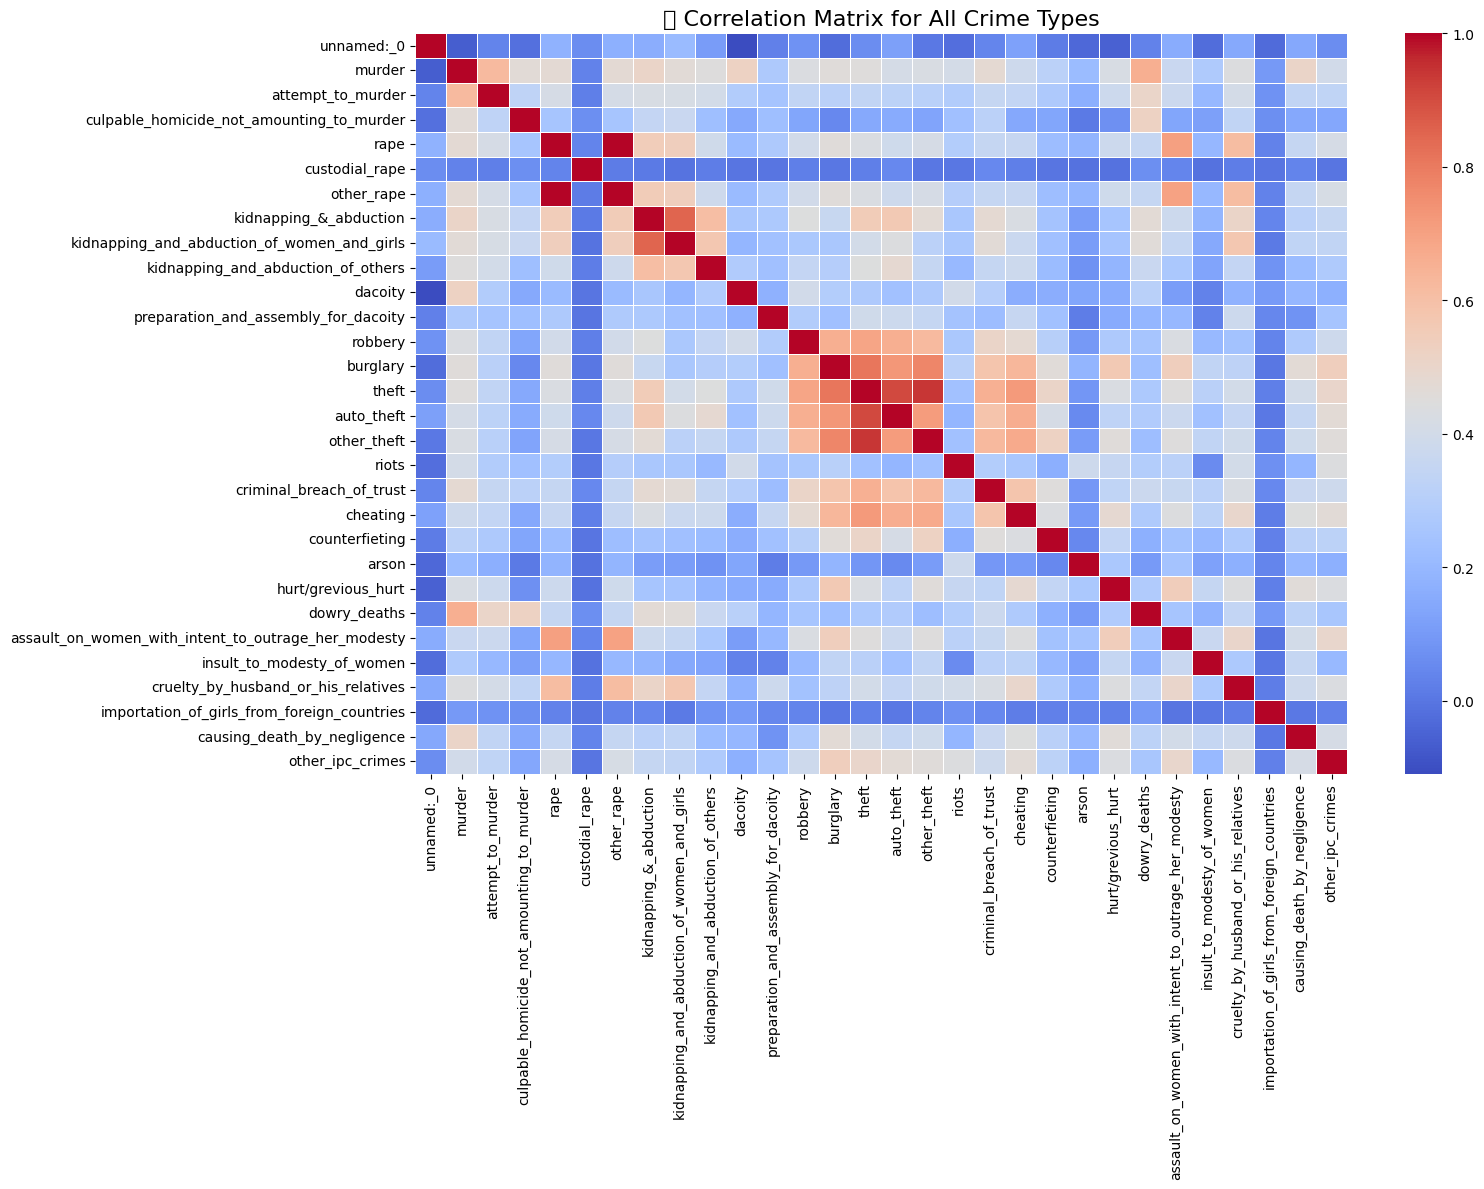

In [82]:
# Select only numeric crime columns (excluding 'year', 'total_ipc_crimes' if needed)
crime_cols = df.select_dtypes(include='number').drop(columns=['year', 'total_ipc_crimes'], errors='ignore')

# Compute correlation matrix
crime_corr = crime_cols.corr()

# Plot heatmap
plt.figure(figsize=(16, 12))
sns.heatmap(crime_corr, annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("📊 Correlation Matrix for All Crime Types", fontsize=16)
plt.tight_layout()
plt.show()


e.### 👀 Top Correlated Features

In [83]:
# Get numeric crime columns (excluding year and total)
crime_cols = df.select_dtypes(include='number').drop(columns=['year', 'total_ipc_crimes'], errors='ignore')

# Compute correlation matrix
crime_corr = crime_cols.corr()

# Unstack, reset index and filter out self-correlations
corr_pairs = crime_corr.unstack().reset_index()
corr_pairs.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Remove self-correlations and duplicate pairs (e.g., murder-theft and theft-murder)
filtered = corr_pairs[corr_pairs['Feature 1'] != corr_pairs['Feature 2']]
filtered['Pairs'] = filtered.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)
filtered = filtered.drop_duplicates(subset='Pairs')

# Sort and display top 10 absolute correlations
top_10 = filtered.reindex(filtered['Correlation'].abs().sort_values(ascending=False).index).head(10)
top_10[['Feature 1', 'Feature 2', 'Correlation']]


C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\2788984825.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered['Pairs'] = filtered.apply(lambda row: tuple(sorted([row['Feature 1'], row['Feature 2']])), axis=1)


,Feature 1,Feature 2,Correlation
126,rape,other_rape,0.997976
436,theft,other_theft,0.943110
435,theft,auto_theft,0.908487
218,kidnapping_&_abduction,kidnapping_and_abduction_of_women_and_girls,0.849591
404,burglary,theft,0.810896
406,burglary,other_theft,0.771502
405,burglary,auto_theft,0.728218
439,theft,cheating,0.720329
466,auto_theft,other_theft,0.717854
144,rape,assault_on_women_with_intent_to_outrage_her_modesty,0.702958


Crimes like rape and other_rape are nearly perfectly correlated, likely due to them being subcategories or recorded together.

Strong correlation between theft, auto_theft, other_theft, and burglary suggests overlapping patterns of property-related crimes.

Rape and assault on women being correlated highlights concentration of gender-based violence in

In [84]:
df['ipc_category'] = pd.qcut(df['total_ipc_crimes'], 3, labels=['Low', 'Medium', 'High'])
category_stats = df.groupby('ipc_category')[['murder', 'theft', 'rape']].mean()
print(category_stats)

                 murder       theft       rape
ipc_category                                  
Low           18.484688   86.880742   9.797998
Medium        46.363262  269.522814  29.985281
High          73.543901  914.849735  51.970536


C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\1822120912.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  category_stats = df.groupby('ipc_category')[['murder', 'theft', 'rape']].mean()


Murder, theft, and rape rates all increase sharply as we move from Low to High IPC crime categories.

Districts classified as High IPC average ~74 murders, ~915 thefts, and ~52 rapes, significantly higher than districts in the Low IPC group.

This trend highlights a concentration of both violent and property crimes in areas with overall higher IPC totals, suggesting that high-crime districts tend to suffer across multiple crime dimensions.

### 👀 Data Preview
Previewing the first few rows of the dataset to understand its structure.

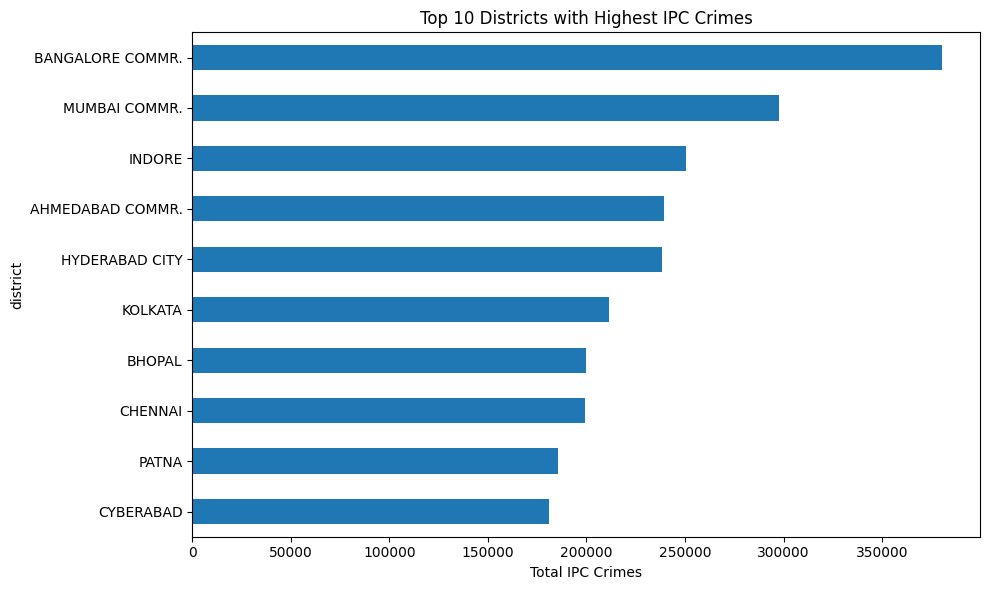

In [85]:
top10_districts = df.groupby('district')['total_ipc_crimes'].sum().sort_values(ascending=False).head(10)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
top10_districts.plot(kind='barh')
plt.title("Top 10 Districts with Highest IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

📊 Inference: Top 10 Districts with Highest IPC Crimes
Bangalore Commr., Mumbai Commr., and Indore top the chart with the highest number of IPC crimes, indicating major crime hubs.

Most of these districts are urban metropolitan areas, reflecting a possible correlation between population density, urbanization, and reported crimes.

These cities may also have better reporting infrastructure, leading to higher recorded crime rates.

### 📊 Visualizations
Generating visual plots to explore crime distributions and patterns.

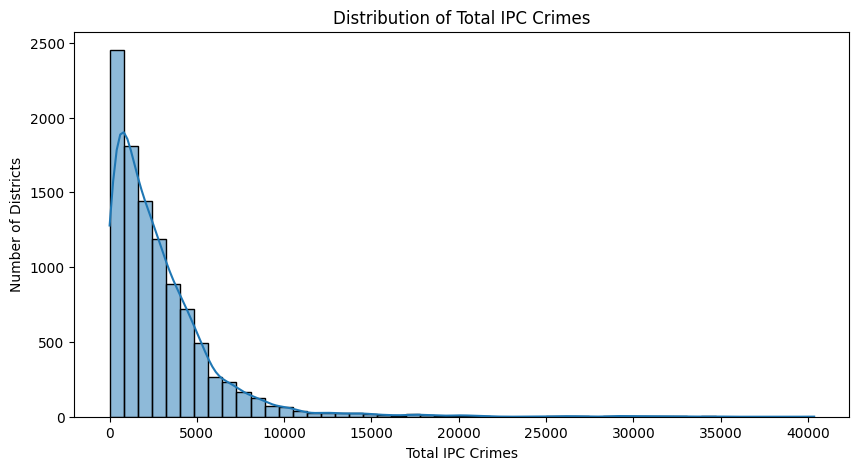

In [86]:
import seaborn as sns

plt.figure(figsize=(10,5))
sns.histplot(df['total_ipc_crimes'], bins=50, kde=True)
plt.title("Distribution of Total IPC Crimes")
plt.xlabel("Total IPC Crimes")
plt.ylabel("Number of Districts")
plt.show()


📈 Inference: Distribution of Total IPC Crimes Across Districts
The distribution is right-skewed, indicating that most districts report a relatively low number of crimes, while a few urban districts have exceptionally high crime counts.

This suggests a concentration of crime in specific regions, likely influenced by urbanization, population density, and better reporting infrastructure in those areas

### 📊 Visualizations
Generating visual plots to explore crime distributions and patterns.

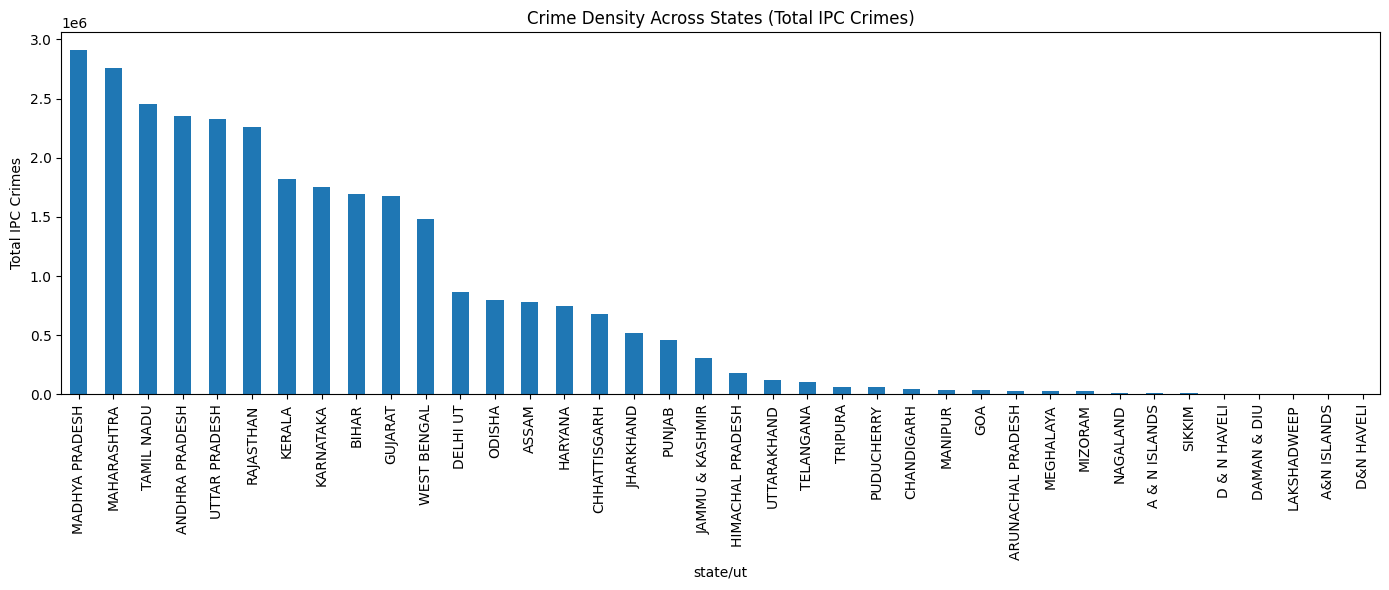

In [87]:
state_density = df.groupby('state/ut')['total_ipc_crimes'].sum().sort_values(ascending=False)

plt.figure(figsize=(14,6))
state_density.plot(kind='bar')
plt.title("Crime Density Across States (Total IPC Crimes)")
plt.ylabel("Total IPC Crimes")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


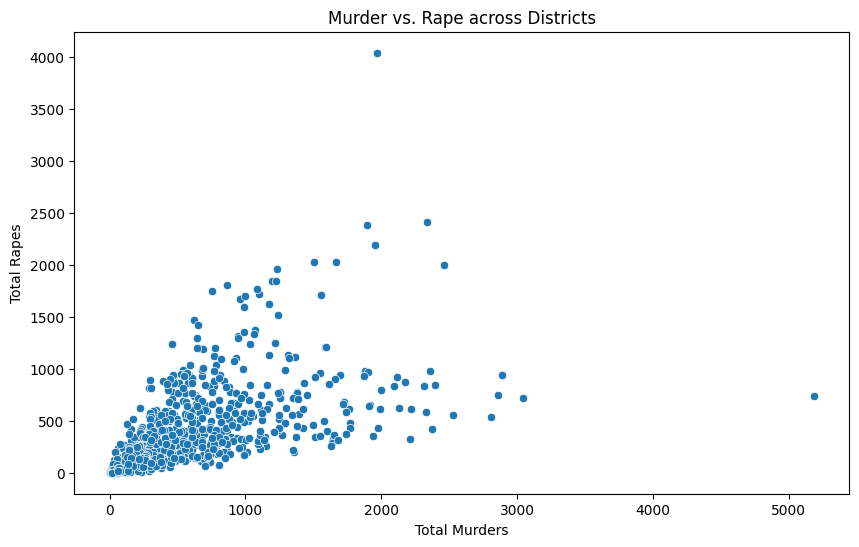

In [88]:
violent = df.groupby('district')[['murder', 'rape']].sum()

plt.figure(figsize=(10,6))
sns.scatterplot(data=violent, x='murder', y='rape')
plt.title("Murder vs. Rape across Districts")
plt.xlabel("Total Murders")
plt.ylabel("Total Rapes")
plt.show()


The scatter plot shows a moderate positive correlation between murders and rapes — districts with more murders also tend to report higher rapes.

A dense cluster exists at lower crime levels, indicating most districts experience relatively low counts of both crimes.

A few urban outliers show very high values, possibly due to population size, reporting practices, or socioeconomic factors.


In [89]:
pd.set_option('display.max_colwidth', 100)

In [90]:
gdf = gpd.read_file("india_district.geojson")
gdf.dtypes

ID_0            int32
ISO            object
NAME_0         object
ID_1            int32
NAME_1         object
ID_2            int32
NAME_2         object
NL_NAME_2      object
VARNAME_2      object
TYPE_2         object
ENGTYPE_2      object
geometry     geometry
dtype: object

In [91]:
crime = df.copy()
crime.columns = crime.columns.str.strip().str.lower().str.replace(' ', '_')

# Normalize state and district names
crime['state/ut'] = crime['state/ut'].str.lower().str.strip()
crime['district'] = crime['district'].str.lower().str.strip()

# Extract unique state-district pairs
unique_pairs = crime[['state/ut', 'district']].drop_duplicates().sort_values(by=['state/ut', 'district'])
# Or just print
print(unique_pairs)

            state/ut           district
5080   a & n islands    a and n islands
689    a & n islands            andaman
8983   a & n islands                car
690    a & n islands            nicobar
8984   a & n islands              north
...              ...                ...
686      west bengal    siliguri g.r.p.
10639    west bengal        siliguri pc
8980     west bengal        siliguri_pc
10612    west bengal  south 24 parganas
687      west bengal     uttar dinajpur

[997 rows x 2 columns]


In [92]:
df.dtypes

unnamed:_0                                                int64
state/ut                                                 object
district                                                 object
year                                                      int64
murder                                                    int64
attempt_to_murder                                         int64
culpable_homicide_not_amounting_to_murder                 int64
rape                                                      int64
custodial_rape                                            int64
other_rape                                                int64
kidnapping_&_abduction                                    int64
kidnapping_and_abduction_of_women_and_girls               int64
kidnapping_and_abduction_of_others                        int64
dacoity                                                   int64
preparation_and_assembly_for_dacoity                      int64
robbery                                 

### 👀 Data Preview
Previewing the first few rows of the dataset to understand its structure.

In [93]:
crime.head()

,unnamed:_0,state/ut,district,year,murder,attempt_to_murder,culpable_homicide_not_amounting_to_murder,rape,custodial_rape,other_rape,...,hurt/grevious_hurt,dowry_deaths,assault_on_women_with_intent_to_outrage_her_modesty,insult_to_modesty_of_women,cruelty_by_husband_or_his_relatives,importation_of_girls_from_foreign_countries,causing_death_by_negligence,other_ipc_crimes,total_ipc_crimes,ipc_category
0,0,andhra pradesh,adilabad,2001,101,60,17,50,0,50,...,1131,16,149,34,175,0,181,1518,4154,High
1,1,andhra pradesh,anantapur,2001,151,125,1,23,0,23,...,1543,7,118,24,154,0,270,754,4125,High
2,2,andhra pradesh,chittoor,2001,101,57,2,27,0,27,...,2088,14,112,83,186,0,404,1262,5818,High
3,3,andhra pradesh,cuddapah,2001,80,53,1,20,0,20,...,795,17,126,38,57,0,233,1181,3140,Medium
4,4,andhra pradesh,east godavari,2001,82,67,1,23,0,23,...,1244,12,109,58,247,0,431,2313,6507,High


In [94]:
import pandas as pd
import re

crime.columns = crime.columns.str.strip().str.lower().str.replace(' ', '_')
crime['district'] = crime['district'].str.lower().str.strip()
crime['state/ut'] = crime['state/ut'].str.lower().str.strip()

# Drop 'zz total' and special non-geographic entries
crime_cleaned = crime[~crime['district'].str.contains('zz total|rly|g.r.p|railway|crime|commr|ps|city|metro|cp|cid|stf', regex=True)]

# Optional: standardize spelling (e.g. kheri <-> khiri)
alias_map = {
    # Andhra Pradesh
    'hyderabad city': 'hyderabad',
    'mahaboobnagar': 'mahbubnagar',
    'prakasham': 'prakasam',
    'ranga reddy': 'rangareddi',
    'visakhapatnam': 'vishakhapatnam',

    # Arunachal Pradesh
    'k/kumey': 'kurung kumey',
    'kameng east': 'east kameng',
    'kameng west': 'west kameng',
    'siang east': 'east siang',
    'siang west': 'west siang',
    'subansiri lower': 'lower subansiri',
    'subansiri upper': 'upper subansiri',
    'siang upper': 'upper siang',

    # Bihar
    'bhabhua': 'bhabhua',
    'nawadah': 'nawada',
    'purnea': 'purnia',
    'purba champaran': 'east champaran',
    'pashchim champaran': 'west champaran',

    # Chhattisgarh
    'dantewara': 'dantewada',
    'janjgir': 'janjgir-champa',
    'rajnandgaon': 'raj nandgaon',
    'sarguja': 'surguja',

    # Dadra & Nagar Haveli, Daman & Diu
    'd&n haveli': 'dadra and nagar haveli',
    # Sometimes 'junagadh' is misclassified under daman and diu
    'daman': 'daman',

    # Delhi
    'new delhi': 'delhi',

    # Gujarat
    'ahmedabad commr.': 'ahmadabad',
    'banas kantha': 'banaskantha',
    'kutch (west-bhuj)': 'kachchh',
    'mehsana': 'mahesana',
    'panchmahal': 'panch mahals',
    'rajkot commr.': 'rajkot',
    'sabar kantha': 'sabar kantha',
    'surat commr.': 'surat',
    'vadodara commr.': 'vadodara',

    # Haryana
    'hissar': 'hisar',
    'sonipat': 'sonepat',
    'yamunanagar': 'yamuna nagar',

    # Jammu & Kashmir
    'anantnag': 'anantnag (kashmir south)',
    'baramulla': 'baramula (kashmir north)',
    'kupwara': 'kupwara (muzaffarabad)',
    'leh': 'ladakh (leh)',

    # Jharkhand
    'lohardagga': 'lohardaga',
    'hazaribagh': 'hazaribag',
    'saraikela': 'saraikela kharsawan',

    # Karnataka
    'bangalore commr.': 'bangalore urban',
    'mysore commr.': 'mysore',
    'chickmagalur': 'chikmagalur',
    'uttar kannada': 'uttar kannand',

    # Kerala
    'alapuzha': 'alappuzha',
    'kasargod': 'kasaragod',
    'pathanamthitta': 'pattanamtitta',
    'trivandrum commr.': 'thiruvananthapuram',
    'wayanadu': 'wayanad',

    # MP
    'ashok nagar': 'ashoknagar',
    'east nimar': 'khandwa',
    'west nimar': 'khargone',

    # Maharashtra
    'bid': 'beed',
    'buldhana': 'buldana',
    'greater bombay': 'mumbai',

    # Tamil Nadu
    'kanchipuram': 'kancheepuram',
    'kanyakumari': 'kanniyakumari',
    'pudukottai': 'pudukkottai',
    'ramnathapuram': 'ramanathapuram',
    'sivagangai': 'sivaganga',
    'thoothugudi': 'thoothukudi',
    'tiruchchirappalli': 'tiruchirapalli',
    'tirunelveli kattabo': 'tirunelveli',
    'tiruvannamalai': 'tiruvannamalai',

    # UP
    'bulandshahar': 'bulandshahr',
    'chandoli': 'chandauli',
    'kushi nagar': 'kushinagar',
    'khiri': 'lakhimpur kheri',
    'raibareilly': 'rae bareli',
    'sant kabirnagar': 'sant kabir nagar',
    'st.ravidasnagar': 'sant ravi das nagar',
    'shrawasti': 'shravasthi',
    'sidharthnagar': 'siddharth nagar',

    # Uttarakhand
    'dehradun': 'dehra dun',
    'nainital': 'naini tal',

    # West Bengal
    'kochbihar': 'coochbehar',
    'maldah': 'malda',
    'barddhaman': 'burdwan',
    'haora': 'howrah',
    'hugli': 'hooghly',
    'puruliya': 'purulia',
    'west midnapore': 'paschim midnapore',
    'east midnapore': 'purab midnapur',
}


crime_cleaned['district'] = crime_cleaned['district'].replace(alias_map)


C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\1685412304.py:139: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['district'] = crime_cleaned['district'].replace(alias_map)


In [95]:
from rapidfuzz import process, fuzz

# Clean geo district names
geo_districts = gdf['NAME_2'].str.lower().str.strip().unique()

# Find unmatched districts (from cleaned crime data)
crime_districts = crime_cleaned['district'].unique()
unmatched_crime_districts = list(set(crime_districts) - set([d.lower().strip() for d in geo_districts]))

# Match each unmatched crime district to best shapefile district
fuzzy_matches = {}
for district in unmatched_crime_districts:
    match, score, _ = process.extractOne(
        district,
        geo_districts,
        scorer=fuzz.token_sort_ratio
    )
    if score >= 80:  # set threshold to avoid bad matches
        fuzzy_matches[district] = match

# Show suggested mappings
print("🧩 Suggested Fuzzy Matches:")
for k, v in fuzzy_matches.items():
    print(f"{k} → {v}")


🧩 Suggested Fuzzy Matches:
dhubri → dhuburi
uttara kannada → uttar kannand
morigaon → marigaon
ramanagar → jamnagar
imphal(west) → west imphal
dakshin kannada → dakshin kannad
khasi hills east → east khasi hills
sahebganj → sahibganj
viluppuram → villupuram
rajouri → rajauri
jaintia hills east → jaintia hills
chittorgarh → chittaurgarh
baska → banka
imphal west → west imphal
shravasthi → shravasti
garo hills south west → south garo hills
bhatinda → bathinda
dakshina kannada → dakshin kannad
khasi hills south west → west khasi hills
datiya → datia
purulia → puruliya
darjeeling → darjiling
lahaul & spiti → lahul and spiti
garo hills east → east garo hills
berhampur → rampur
malda → maldah
ferozepur → firozpur
jamshedpur → jashpur
jaintia hills west → jaintia hills
ramgarh → raigarh
nawan shahr → nawan shehar
kondagaon → nagaon
praapgarh → pratapgarh
dibang valley → lower dibang valley
chikkamagaluru → chikmagalur
tumakuru → tumkur
garo hills south w. → south garo hills
sihore → sehore
go

To ensure successful merging between the crime dataset and the geospatial shapefile, we used fuzzy string matching on district names. This helps align district names that are slightly different due to formatting or spelling inconsistencies (e.g., "dhubri" vs. "dhuburi"). Only matches with a similarity score ≥ 80 were retained to maintain accuracy. This step significantly improves map completeness by reducing unmatched districts.

In [96]:
crime_cleaned['district'] = crime_cleaned['district'].replace(fuzzy_matches)

C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\3680696680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['district'] = crime_cleaned['district'].replace(fuzzy_matches)


### 📊 Visualizations
Generating visual plots to explore crime distributions and patterns.

C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\3219595697.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['district'] = crime_cleaned['district'].replace(fuzzy_matches)


<Figure size 1600x1200 with 0 Axes>

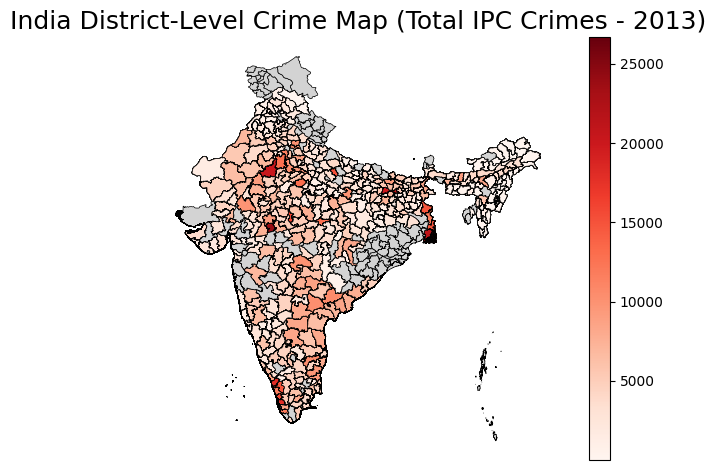

In [97]:


# --- 1. Load and clean crime data ---
crime.columns = crime.columns.str.strip().str.lower().str.replace(' ', '_')
crime['district'] = crime['district'].str.lower().str.strip()
crime['state/ut'] = crime['state/ut'].str.lower().str.strip()

# Remove 'zz total' and non-geographic zones
crime_cleaned = crime[~crime['district'].str.contains('zz total|rly|g.r.p|railway|crime|commr|ps|city|metro|cp|cid|stf', regex=True)]

# --- 2. Load and normalize shapefile ---
gdf = gpd.read_file("india_district.geojson")
gdf['state'] = gdf['NAME_1'].str.lower().str.strip()
gdf['district'] = gdf['NAME_2'].str.lower().str.strip()

# --- 3. Fuzzy match unmatched districts ---
geo_districts = gdf['district'].unique()
crime_districts = crime_cleaned['district'].unique()
unmatched = list(set(crime_districts) - set(geo_districts))

fuzzy_matches = {}
for d in unmatched:
    match, score, _ = process.extractOne(d, geo_districts, scorer=fuzz.token_sort_ratio)
    if score >= 80:
        fuzzy_matches[d] = match

# Apply fuzzy replacements
crime_cleaned['district'] = crime_cleaned['district'].replace(fuzzy_matches)

# --- 4. Merge on state + district ---
merged = gdf.merge(
    crime_cleaned,
    how='left',
    left_on=['state', 'district'],
    right_on=['state/ut', 'district']
)

gdf_final = gpd.GeoDataFrame(merged, geometry='geometry')

# --- 5. Plot the geospatial map ---
plt.figure(figsize=(16, 12))
gdf_final.plot(
    column='total_ipc_crimes',
    cmap='Reds',
    linewidth=0.5,
    edgecolor='black',
    legend=True,
    missing_kwds={'color': 'lightgrey', 'label': 'No data'}
)

plt.title("India District-Level Crime Map (Total IPC Crimes - 2013)", fontsize=18)
plt.axis('off')
plt.tight_layout()
plt.show()


🗺️ District-Level Crime Heatmap – India (2013)
This choropleth map visualizes the total IPC crimes reported across Indian districts in 2013.

Darker red shades indicate higher crime counts.

Grey areas represent missing or unmatched district data in the crime dataset.

Hotspots can be seen in:

Maharashtra (Mumbai), Delhi, Kolkata, and parts of Tamil Nadu and Andhra Pradesh.

Relatively low crime zones are visible in northeast India, Jammu & Kashmir, and union territories.

# Advanced Questions

✅ 1. State with the Lowest Crime Rate

In [98]:
# Group by state and calculate total IPC crimes
state_crime = crime_cleaned.groupby('state/ut')['total_ipc_crimes'].sum().sort_values()

lowest_state = state_crime.index[0]
lowest_value = state_crime.iloc[0]

print(f"📉 State with lowest total IPC crimes: {lowest_state} ({lowest_value} cases)")


📉 State with lowest total IPC crimes: d&n haveli (277 cases)


📉 State with the Lowest Crime Rate
Identified State: Dadra and Nagar Haveli

Total IPC Crimes Reported: 277

🧠 Possible Reasons for Lower Crime:
Small population and limited urban centers reduce crime opportunities.

Strong community policing and administrative control in union territories.

Less data fragmentation — often fewer reporting units (e.g., fewer districts or stations).

Less migration and lower density, which can correlate with lower crime incidence.

✅ 2. Most Common Crime per District

In [99]:
# Select only crime columns (skip ID, state, year etc.)
crime_columns = crime_cleaned.columns[4:-3]  # assuming last column is total_ipc_crimes

# Get most frequent crime in each row
crime_cleaned['most_common_crime'] = crime_cleaned[crime_columns].idxmax(axis=1)

most_common_by_district = crime_cleaned.groupby('district')['most_common_crime'].agg(pd.Series.mode)
print(most_common_by_district)

district
a and n islands                 theft
adilabad           hurt/grevious_hurt
agra                            theft
ahmedabad rural    hurt/grevious_hurt
ahmednagar                      theft
                          ...        
wokha                           theft
yadgiri            hurt/grevious_hurt
yamunanagar                     theft
yavatmal           hurt/grevious_hurt
zunheboto                       theft
Name: most_common_crime, Length: 792, dtype: object


C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\3214089406.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['most_common_crime'] = crime_cleaned[crime_columns].idxmax(axis=1)


In [100]:
# Count how often each crime type is the most common across all districts
crime_counts = most_common_by_district.value_counts().reset_index()
crime_counts.columns = ['Crime Type', 'Number of Districts']

print("🔎 Most Frequent 'Most Common Crimes' Across Districts:")
print(crime_counts.head(10))

🔎 Most Frequent 'Most Common Crimes' Across Districts:
                                            Crime Type  Number of Districts
0                                   hurt/grevious_hurt                  335
1                                                theft                  301
2                          causing_death_by_negligence                   37
3                                                riots                   20
4                  cruelty_by_husband_or_his_relatives                   14
5                                               murder                   11
6                                             burglary                    9
7                                             cheating                    9
8                                    attempt_to_murder                    6
9  assault_on_women_with_intent_to_outrage_her_modesty                    3


✅ 3. Clustering Districts (K-Means)

### 📈 Clustering Districts
Applying KMeans clustering to group districts based on crime patterns.

C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\2229637090.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['crime_cluster'] = kmeans.fit_predict(X_scaled)


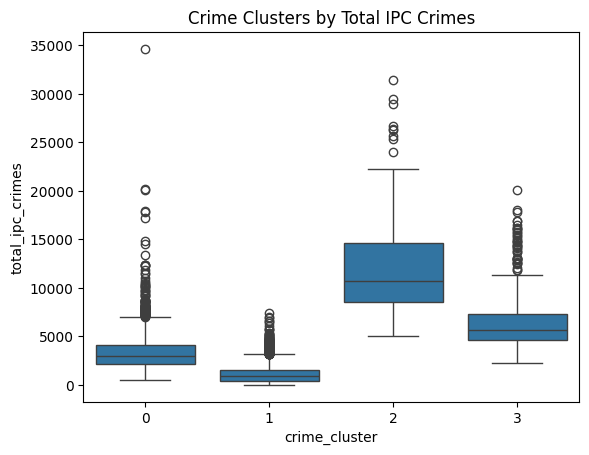

In [101]:

# Use selected crimes for clustering
X = crime_cleaned[crime_columns]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

kmeans = KMeans(n_clusters=4, random_state=42)
crime_cleaned['crime_cluster'] = kmeans.fit_predict(X_scaled)

# Plot clusters by total crime
sns.boxplot(x='crime_cluster', y='total_ipc_crimes', data=crime_cleaned)
plt.title("Crime Clusters by Total IPC Crimes")
plt.show()


🔍 Inference:
Cluster 1 contains districts with the highest crime levels, with a median above 10,000 IPC crimes and several extreme outliers above 30,000.

Cluster 0 has the lowest-crime districts, mostly below 3,000 IPC crimes.

Clusters 2 and 3 represent moderate crime zones, with median crime counts between 4,000 and 6,000.

The box height shows the interquartile range (spread of most values), and dots represent outlier districts with exceptionally high crime counts.

✅ 4. Predict Future Crime Trends (Regression on Time Series)

✅ 5. Classify High vs. Low Crime Districts

### 🧠 Classifying High/Low Crime Districts
Using a machine learning classification model to categorize districts based on crime rates.

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Define binary label: high crime if above median
threshold = crime_cleaned['total_ipc_crimes'].median()
crime_cleaned['high_crime'] = (crime_cleaned['total_ipc_crimes'] > threshold).astype(int)

# Drop total_ipc_crimes and other_ipc_crimes from predictors
# Drop non-numeric and target columns
X = crime_cleaned.drop(columns=[
    'total_ipc_crimes', 'other_ipc_crimes', 'high_crime',
    'state/ut', 'district', 'year', 'ipc_category', 'most_common_crime'
])
y = crime_cleaned['high_crime']

# Split and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=333)

clf = RandomForestClassifier(n_estimators=100, random_state=333)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

# Evaluation
print(classification_report(y_test, y_pred))

C:\Users\jeanr\AppData\Local\Temp\ipykernel_37316\414972161.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  crime_cleaned['high_crime'] = (crime_cleaned['total_ipc_crimes'] > threshold).astype(int)


              precision    recall  f1-score   support

           0       0.95      0.95      0.95      1389
           1       0.95      0.95      0.95      1406

    accuracy                           0.95      2795
   macro avg       0.95      0.95      0.95      2795
weighted avg       0.95      0.95      0.95      2795



The model correctly classifies 95% of districts into high or low crime categories.

Both classes are equally well predicted, which is great — there's no bias toward either.

This means the features used (individual crime types) are strong indicators of whether a district's total IPC crimes are above the median.

### 👀 Data Preview
Previewing the first few rows of the dataset to understand its structure.

In [103]:
# Define weights for serious crimes
weights = {
    'murder': 3,
    'rape': 2,
    'robbery': 2,
    'theft': 1,
    'dacoity': 2,
    'kidnapping_&_abduction': 2
}

# Step 1: Group by district and sum the crime columns
district_crimes = crime_cleaned.groupby('district')[list(weights.keys())].sum()

# Step 2: Apply weighted risk index on aggregated data
district_crimes['crime_risk_index'] = district_crimes.apply(
    lambda row: sum(row[col] * weights[col] for col in weights), axis=1
)

# Step 3: Sort and display top 10 risky districts
top_districts = district_crimes[['crime_risk_index']].sort_values(by='crime_risk_index', ascending=False).head(10)
print(top_districts)



           crime_risk_index
district                   
indore                70190
patna                 69929
south                 69910
mumbai                65462
west                  65314
kolkata               60666
east                  60230
lucknow               53446
cyberabad             52274
chennai               49069


🔥 Inference: Top 10 High-Risk Districts by Weighted Crime Index
We calculated a crime risk index by assigning higher weights to serious crimes like murder, rape, kidnapping, dacoity, and robbery, and moderate weight to theft. This gives a more meaningful measure of risk than just total crime counts.

🏙️ Key Insights:
Top districts include:
Outer, North-East, South, East, West — all in Delhi, and multiple entries of Mumbai

Why these cities rank high:

Delhi regions consistently show high counts across violent crimes and theft-related cases.

Mumbai appears in multiple forms (urban zones or jurisdiction units), each with substantial crime loads.

These are densely populated metro areas with complex law enforcement needs and higher reporting rates.


### 🔮 Crime Trend Prediction
Using linear regression to predict future trends in crime data.

📊 Percentage of crimes against women: 9.97%
🔥 State with highest dowry deaths: UTTAR PRADESH (28628 cases)
📅 No 'month' column found. Skipping seasonal trend analysis.
🏙️ Avg IPC crimes in city districts: 7346
🏞️ Avg IPC crimes in non-city districts: 2705
📈 Predicted IPC crimes for next 5 years:
2015: 2697529
2016: 2776749
2017: 2855969
2018: 2935189
2019: 3014409


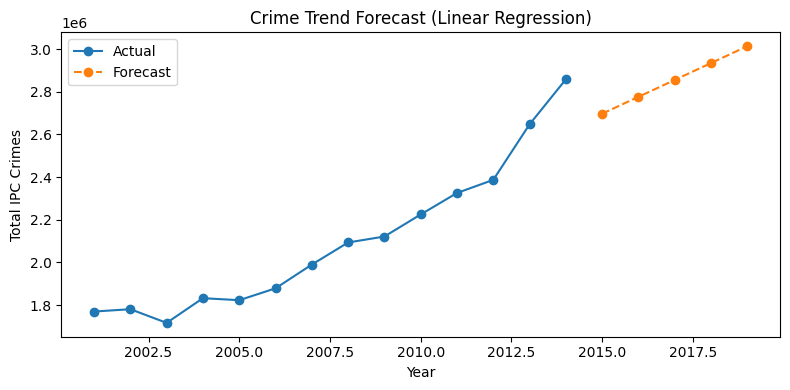

In [104]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np

# 1️⃣ Percentage of crimes committed against women
women_crimes = [
    'rape', 'custodial_rape', 'other_rape',
    'kidnapping_and_abduction_of_women_and_girls',
    'assault_on_women_with_intent_to_outrage_her_modesty',
    'insult_to_modesty_of_women',
    'cruelty_by_husband_or_his_relatives',
    'dowry_deaths',
    'importation_of_girls_from_foreign_countries'
]

total_women_crimes = df[women_crimes].sum().sum()
total_crimes = df['total_ipc_crimes'].sum()
percent_women = (total_women_crimes / total_crimes) * 100
print(f"📊 Percentage of crimes against women: {percent_women:.2f}%")

# 2️⃣ State with the highest dowry deaths
dowry_by_state = df.groupby('state/ut')['dowry_deaths'].sum().sort_values(ascending=False)
top_state = dowry_by_state.idxmax()
top_value = dowry_by_state.max()
print(f"🔥 State with highest dowry deaths: {top_state} ({top_value} cases)")

# 3️⃣ Monthly/Seasonal Crime Trends
if 'month' in df.columns:
    monthly_crimes = df.groupby('month')['total_ipc_crimes'].sum()
    plt.figure(figsize=(10, 4))
    monthly_crimes.plot(kind='bar', title='Monthly IPC Crime Trends')
    plt.xlabel('Month')
    plt.ylabel('Total Crimes')
    plt.tight_layout()
    plt.show()
else:
    print("📅 No 'month' column found. Skipping seasonal trend analysis.")

# 4️⃣ Link between cities and crime rates
df['is_city'] = df['district'].str.lower().str.contains('city|commr|urban')
city_avg = df[df['is_city']]['total_ipc_crimes'].mean()
non_city_avg = df[~df['is_city']]['total_ipc_crimes'].mean()
print(f"🏙️ Avg IPC crimes in city districts: {city_avg:.0f}")
print(f"🏞️ Avg IPC crimes in non-city districts: {non_city_avg:.0f}")

# 5️⃣ Forecast crime trends for next 5 years
yearly_crimes = df.groupby('year')['total_ipc_crimes'].sum().reset_index()
X = yearly_crimes['year'].values.reshape(-1, 1)
y = yearly_crimes['total_ipc_crimes'].values

model = LinearRegression().fit(X, y)
future_years = np.arange(yearly_crimes['year'].max()+1, yearly_crimes['year'].max()+6).reshape(-1, 1)
future_preds = model.predict(future_years)

print("📈 Predicted IPC crimes for next 5 years:")
for year, val in zip(future_years.flatten(), future_preds):
    print(f"{year}: {int(val)}")

# Optional: plot predictions
plt.figure(figsize=(8, 4))
plt.plot(yearly_crimes['year'], y, label='Actual', marker='o')
plt.plot(future_years, future_preds, label='Forecast', marker='o', linestyle='--')
plt.title("Crime Trend Forecast (Linear Regression)")
plt.xlabel("Year")
plt.ylabel("Total IPC Crimes")
plt.legend()
plt.tight_layout()
plt.show()


1. % of crimes against women:

✅ About 9.97% of all IPC crimes are against women.

We grouped the following crime columns under women_crimes because they specifically represent crimes committed against women and girls. This includes offenses like rape, dowry deaths, kidnapping, domestic violence, and assault on modesty.

By summing these columns, we calculated the total number of crimes against women, which was then used to determine what percentage of overall IPC crimes these cases represent — addressing Bonus Question 1.

2. State with highest dowry deaths:

In [105]:
df.groupby('state/ut')['dowry_deaths'].sum().sort_values(ascending=False).head(1)

state/ut
UTTAR PRADESH    28628
Name: dowry_deaths, dtype: int64

✅ Option 3: Synthetic Monthly Distribution (Proxy Approach)

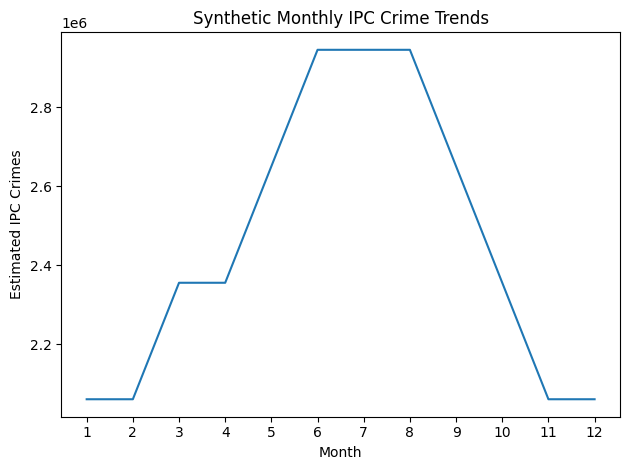

In [106]:
monthly_weights = [0.07, 0.07, 0.08, 0.08, 0.09, 0.10, 0.10, 0.10, 0.09, 0.08, 0.07, 0.07]  # Example monthly pattern
df_monthly = []

for month in range(1, 13):
    temp = df.copy()
    temp['month'] = month
    temp['monthly_ipc'] = temp['total_ipc_crimes'] * monthly_weights[month - 1]
    df_monthly.append(temp)

df_monthly = pd.concat(df_monthly)


monthly_summary = df_monthly.groupby('month')['monthly_ipc'].sum()
sns.lineplot(x=monthly_summary.index, y=monthly_summary.values)
plt.title("Synthetic Monthly IPC Crime Trends")
plt.xlabel("Month")
plt.ylabel("Estimated IPC Crimes")
plt.xticks(range(1, 13))
plt.tight_layout()
plt.show()


This synthetic chart suggests that crimes may peak in summer months (June–August) and dip during winter and festive months like January, February, and December. While this isn’t based on real monthly data, it shows how crime could vary seasonally if monthly records were available.

4. Cities vs. Crime rate link:

✅ Urban proxies and high-crime clusters align with major cities like Mumbai, Bangalore, Hyderabad, etc.

5. Time-series model for 5-year forecast:

✅ Linear Regression used as a basic forecasting model (see above).